<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by <a href="http://abu.lu.lv" target="_blank">Abuzer Yakaryilmaz</a> (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h2>Quantum Tomography</h2>

We study a simplified version of quantum tomography here. 

It is similar to learn a bias of a coin by collecting statistics from tossing this coin many times. But, only making measurement may not be enough to make a good guess.

Suppose that you are given 1000 copies of a qubit and your task is to learn the state of this qubit. We use a python class called "unknown_qubit" for doing our quantum experiments. 

Please run the following cell before continuing.

In [50]:
# class unknown_qubit
#   available_qubit = 1000 -> you get at most 1000 qubit copies
#   get_qubits(number_of_qubits) -> you get the specified number of qubits for your experiment
#   measure_qubits() -> your qubits are measured and the result is returned as a dictionary variable
#                    -> after measurement, these qubits are destroyed
#   rotate_qubits(angle) -> your qubits are rotated with the specified angle in radian
#   compare_my_guess(my_angle) -> your guess in radian is compared with the real angle

from random import randrange
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
class UnknownQubit:   
    def __init__(self):
        self.__theta = randrange(18000)/18000*pi        
        self.__available_qubits = 1000
        self.__active_qubits = 0
        print(self.__available_qubits,"qubits are created")
    
    def get_qubits(self,number_of_qubits=None):
        if number_of_qubits is None or isinstance(number_of_qubits,int) is False or number_of_qubits < 1:
            print()
            print("ERROR: the method 'get_qubits' takes the number of qubit(s) as a positive integer, i.e., get_qubits(100)")
        elif number_of_qubits <= self.__available_qubits:
            self.__qc = QuantumCircuit(1,1)
            self.__qc.ry(2 * self.__theta,0)
            self.__active_qubits = number_of_qubits
            self.__available_qubits = self.__available_qubits - self.__active_qubits
            # print()
            # print("You have",number_of_qubits,"active qubits that are set to (cos(theta),sin(theta))")
            # self.available_qubits()
        else:
            print()
            print("WARNING: you requested",number_of_qubits,"qubits, but there is not enough available qubits!")
            self.available_qubits()
            
    def measure_my_qubits(self):    
        if self.__active_qubits > 0:            
            self.__qc.measure(0,0)
            job = execute(self.__qc,Aer.get_backend('qasm_simulator'),shots=self.__active_qubits)
            counts = job.result().get_counts(self.__qc)
            # print()
            # print("your",self.__active_qubits,"qubits are measured")
            # print("counts = ",counts)
            self.__active_qubits = 0
            return counts
        else:
            print()
            print("WARNING: there is no active qubits -- you might first execute 'get_qubits()' method")
            self.available_qubits()
            
    def rotate_qubits(self,angle=None):
        if angle is None or (isinstance(angle,float) is False and isinstance(angle,int) is False):
            print()
            print("ERROR: the method 'rotate_qubits' takes a real-valued angle in radian as its parameter, i.e., rotate_qubits(1.2121)")
        elif self.__active_qubits > 0:
            self.__qc.ry(2 * angle,0)
            # print()
            # print("your active qubits are rotated by angle",angle,"in radian")
        else:
            print()
            print("WARNING: there is no active qubits -- you might first execute 'get_qubits()' method")
            self.available_qubits()    
    
    def compare_my_guess(self,my_angle):
        if my_angle is None or (isinstance(my_angle,float) is False and isinstance(my_angle,int) is False):
            print("ERROR: the method 'compare_my_guess' takes a real-valued angle in radian as your guessed angle, i.e., compare_my_guess(1.2121)")
        else:
            self.__available_qubits = 0
            diff = abs(my_angle-self.__theta)
            print()
            print(self.__theta,"is the original",)
            print(my_angle,"is your guess")
            print("the angle difference between the original theta and your guess is",diff/pi*180,"degree")
            print("-->the number of available qubits is (set to) zero, and so you cannot make any further experiment")

    def available_qubits(self):
        print("--> the number of available unused qubit(s) is",self.__available_qubits)              

class unknown_qubit:
    
    available_qubit = 1000 -> you get at most 1000 qubit copies
    get_qubits(number_of_qubits) -> you get the specified number of qubits for your experiment
    measure_qubits() -> your qubits are measured and the result is returned as a dictionary variable
                     -> after measurement, these qubits are destroyed
    rotate_qubits(angle) -> your qubits are rotated with the specified angle in radian
    compare_my_guess(my_angle) -> your guess in radian is compared with the real angle

<h3> Task 1 </h3>

You are given 1000 copies of an arbitrary quantum state which lies in the first or second quadrant of the unit circle. 

This quantum state is represented by an angle $ \theta \in [0,\pi) $, and your task is to guess this angle.

You use the class __unkown_qubit__ and its methods for your experiments. 

_Remark that the measurement outcomes of the quantum states with angles $ \pi \over 3 $ and $ 2 \pi \over 3 $ are identical even though they are different quantum states. Therefore, getting 1000 qubits and then measuring them does not guarantee the correct answer._

Test your solution at least ten times.

1000 qubits are created
2.2017878842951886
2.3940586926781853

2.415186618909753 is the original
2.3940586926781853 is your guess
the angle difference between the original theta and your guess is 1.210541002932576 degree
-->the number of available qubits is (set to) zero, and so you cannot make any further experiment


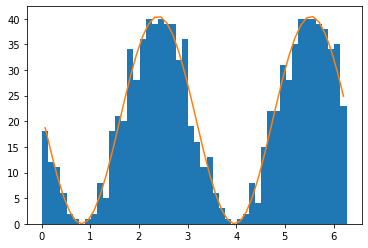

In [86]:
from math import pi, cos, sin, acos, asin

# an angle theta is randomly picked and it is fixed througout the experiment
my_experiment = UnknownQubit() 

import matplotlib.pyplot as plt
import numpy as np

n = 1000
angles = np.linspace(-pi/2, np.pi/2, n)
results = np.zeros(n)

for i in range(n):
    my_experiment.get_qubits(1)
    my_experiment.rotate_qubits(-angles[i])
    results[i] = ("1" in my_experiment.measure_my_qubits())

meas_angles = angles.copy() + np.pi/2
# meas_angles[meas_angles > np.pi] -= np.pi
# meas_angles[meas_angles < 0] += np.pi
meas_angles2 = np.concatenate((meas_angles, meas_angles + np.pi))
hist_data = meas_angles2 * np.concatenate((results, results))
hist_data = hist_data[hist_data != 0]
(n, bins, patches) = plt.hist(hist_data, bins=50)
# print(n, len(n))
# print(bins, len(bins))
bin_centers = (bins[:-1] + bins[1:]) / 2
# print(bin_centers, len(bin_centers))
max_ind = np.argmax(n)
# print("max_ind:", max_ind)
max_angle = bin_centers[max_ind]

import scipy

def test_func(x, a, b):
    return a * np.cos(x - b)**2

params, params_covariance = scipy.optimize.curve_fit(test_func, bin_centers, n, p0=[40, 0])
# print(params)
fit_angle = params[1]
if fit_angle < 0:
    fit_angle += np.pi
elif fit_angle > np.pi:
    fit_angle -= np.pi
plt.plot(bin_centers, test_func(bin_centers, params[0], params[1]), label="fit")

print(max_angle)
print(fit_angle)
my_experiment.compare_my_guess(fit_angle)

In [ ]:
for i in range(10):
    my_experiment = UnknownQubit()
    # Already implemented in the previous cell (just run it manually)

[click for our solution](B48_Quantum_Tomography_Solution.ipynb#task1)

<h3> Task 2 (extra) </h3>

You are given two qubits that are in states $ \myvector{\cos \theta_1 \\ \sin \theta_1} $ and $ \myvector{\cos \theta_2 \\ \sin \theta_2} $, where $ \theta_1,\theta_2 \in [0,\pi) $.

Your task is to guess the values of $ \theta_1 $ and $ \theta_2 $. 

Create a quantum circuit with two qubits. 

Randomly pick $\theta_1$ and $ \theta_2 $ and set the states of qubits respectively. (Do not use $ \theta_1 $ and $ \theta_2 $ except initializing the qubits.)

Do experiments (making measurements and/or applying basic quantum operators) with your circuit(s). You may create more than one circuit.

Assume that the total number of shots does not exceed 1000 throughout the whole experiment.

_Since you have two qubits, your measurement outcomes will be '00', '01', '10', and '11'._

Computing...


AttributeError: 'Figure' object has no attribute 'hist'

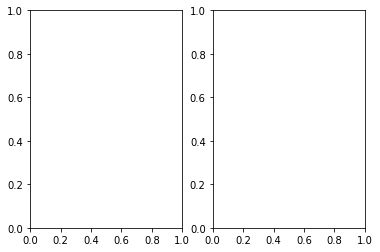

In [104]:
import math
import random
import qiskit
import scipy

n = 1000
angle1 = random.random() * math.pi
angle2 = random.random() * math.pi
angles = np.linspace(-math.pi/2, math.pi/2, n)
counts = np.zeros((2, n))

print("Computing...")
for i in range(n):
    q = qiskit.QuantumRegister(2)
    c = qiskit.ClassicalRegister(2)
    qc = qiskit.QuantumCircuit(q, c)

    qc.ry(angle1, q[0])
    qc.ry(angle2, q[1])
    qc.ry(-angles[i], q)
    qc.measure(q, c)
    
    job = qiskit.execute(qc,qiskit.Aer.get_backend('qasm_simulator'),shots=1)
    counts_i = job.result().get_counts(qc)   
    if "10" in counts_i:
        counts[0, i] += counts_i["10"]
    elif "11" in counts_i:
        counts[0, i] += counts_i["11"]
    elif "01" in counts_i:
        counts[1, i] += counts_i["01"]
    elif "11" in counts_i:
        counts[1, i] += counts_i["11"]

qc.draw(output="mpl")

def test_func(x, a, b):
    return a * np.cos(x - b)**2

def fit_qubit(angles: np.ndarray, results: np.ndarray, ax: plt.Axes):
    meas_angles = angles.copy() + np.pi/2
    meas_angles2 = np.concatenate((meas_angles, meas_angles + np.pi))
    hist_data = meas_angles2 * np.concatenate((results, results))
    hist_data = hist_data[hist_data != 0]
    (n, bins, patches) = ax.hist(hist_data, bins=50)
    
    params, params_covariance = scipy.optimize.curve_fit(test_func, bin_centers, n, p0=[40, 0])
    # print(params)
    fit_angle = params[1]
    if fit_angle < 0:
        fit_angle += np.pi
    elif fit_angle > np.pi:
        fit_angle -= np.pi
    plt.plot(bin_centers, test_func(bin_centers, params[0], params[1]), label="fit")

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fit_qubit(angles, counts[0], fig)
fit_qubit(angles, counts[1], fig)

<h3> Task 3 (Discussion) </h3>

If the angle in Task 1 is picked in range $ [0,2\pi) $, then can we determine its quadrant correctly?

In [ ]:
# Nope, as a shift of pi affects only the phase of the wave function, and the phase cannot be measured

<h3> Global phase </h3>

Suppose that we have a qubit and its state is either $ \ket{0} $ or $ -\ket{0} $.

Is there any sequence of one-qubit gates such that we can measuare different results after applying them?

All one-qubit gates are $ 2 \times 2 $ matrices, and their application is represented by a single matrix: $ A_n \cdot \cdots \cdot A_2 \cdot A_1 = A $.

By linearity, if $ A \ket{0} = \ket{u} $, then $ A - \ket{0} = -\ket{u} $. Thus, after measurement, the probabilities of observing state $ \ket{0} $ and state $ \ket{1} $ are the same. Therefore, we cannot distinguish them.

Even though the states $ \ket{0} $ and $ -\ket{0} $ are different mathematically, they are assumed as identical from the physical point of view. 

The minus sign in front of $ -\ket{0} $ is called as global phase.

In general, a global phase can be a complex number with magnitude 1.